In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder


In [9]:

data_dtr = '/content/drive/MyDrive/kle/plantDisease'
categories = os.listdir(data_dtr)

images = []
labels = []

for category in categories:
  print(categories)
  folder_path = os.path.join(data_dtr,category)
  for img_file in os.listdir(folder_path):
    img_path = os.path.join(folder_path,img_file)
    img = cv2.imread(img_path)
    if img is not None:
      img = cv2.resize(img,(64,64))
      images.append(img)
      labels.append(category)


['Potato___Early_blight', 'Tomato__Target_Spot', 'Tomato_Bacterial_spot', 'Potato___Late_blight', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_healthy']
['Potato___Early_blight', 'Tomato__Target_Spot', 'Tomato_Bacterial_spot', 'Potato___Late_blight', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_healthy']
['Potato___Early_blight', 'Tomato__Target_Spot', 'Tomato_Bacterial_spot', 'Potato___Late_blight', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_healthy']
['Potato___Early_blight', 'Tomato__Target_Spot', 'Tomato_Bacterial_spot', 'Potato___Late_blight', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_healthy']
['Potato___Early_blight', 'Tomato__Target_Spot', 'Tomato_Bacterial_spot', 'Potato___Late_blight', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_healthy']
['Potato___Early_blight', 'Tomato__Target_Spot', 'Tomato_Bacterial_spot', 'Potato___Late_blight', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_healthy']


In [10]:
# Convert to numpy arrays
X = np.array(images)
y = np.array(labels)
print("Labels:",np.unique(y))
print("Data shape:", X.shape)

Labels: ['Potato___Early_blight' 'Potato___Late_blight' 'Tomato__Target_Spot'
 'Tomato__Tomato_YellowLeaf__Curl_Virus' 'Tomato_healthy']
Data shape: (8377, 64, 64, 3)


Class Distribution:
Tomato__Tomato_YellowLeaf__Curl_Virus    3218
Tomato_healthy                           1662
Tomato__Target_Spot                      1454
Potato___Early_blight                    1043
Potato___Late_blight                     1000
Name: count, dtype: int64


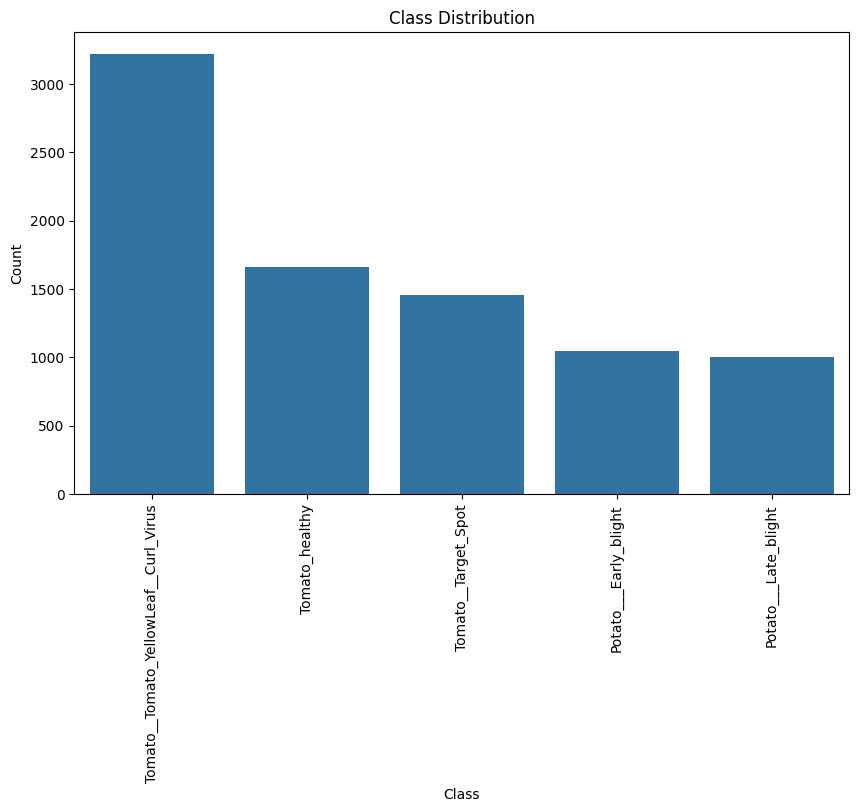

In [11]:
class_counts = pd.Series(y).value_counts()
print("Class Distribution:")
print(class_counts)
# PLot class distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [ ]:
valid_images = []
valid_labels = []
for img,label in zip(X,y):
  if img.shape == (64,64,3):
    valid_images.append(img)
    valid_labels.append(label)

X = np.array(valid_images)
y = np.array(valid_labels)
print("Cleaned Data Shape:", X.shape)

In [ ]:
# Encode labels
le = LabelEncoder()
y = le.fit_transform(y)

# Save class names for later use
class_names = le.classes_

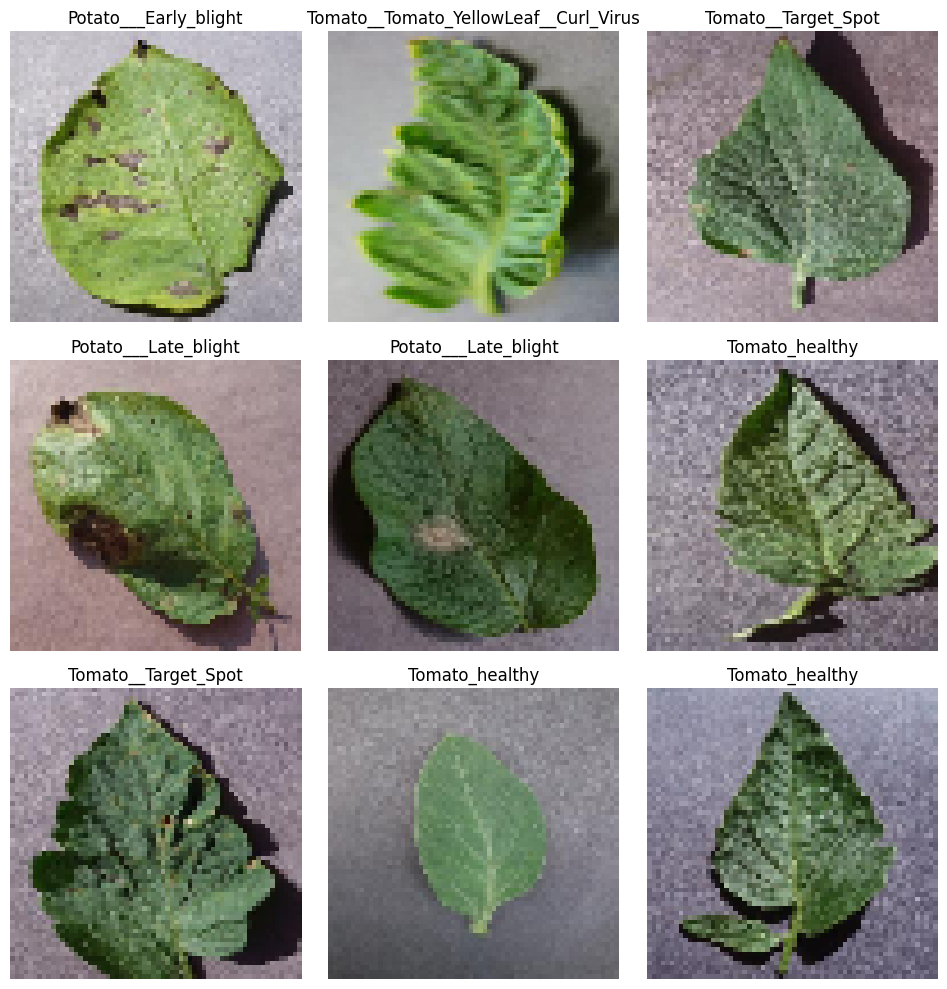

In [14]:
# Show sample images
import random
plt.figure(figsize=(10, 10))
for i in range(9):
  idx = random.randint(0, len(X))
  plt.subplot(3, 3, i + 1)
  plt.imshow(cv2.cvtColor(X[idx], cv2.COLOR_BGR2RGB))
  plt.title(class_names[y[idx]])
  plt.axis('off')
  plt.tight_layout()
plt.show()

In [15]:
def extract_color_histogram(image, bins=(8, 8, 8)):
  # Convert to HSV color space
  image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
  hist = cv2.normalize(hist, hist).flatten()
  return hist

# Extract features
hist_features = [extract_color_histogram(img) for img in X]
x_features = np.array(hist_features)

In [ ]:
# Choose model
model = SVC(kernel='rbf', C=10,gamma='scale')


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_features,y,test_size=0.2,random_state=42)

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_features,y,test_size=0.2,random_state=42)

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_features,y,test_size=0.2,random_state=42)

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

Accuracy: 0.9856801909307876
F1 Score: 0.9856307570926744


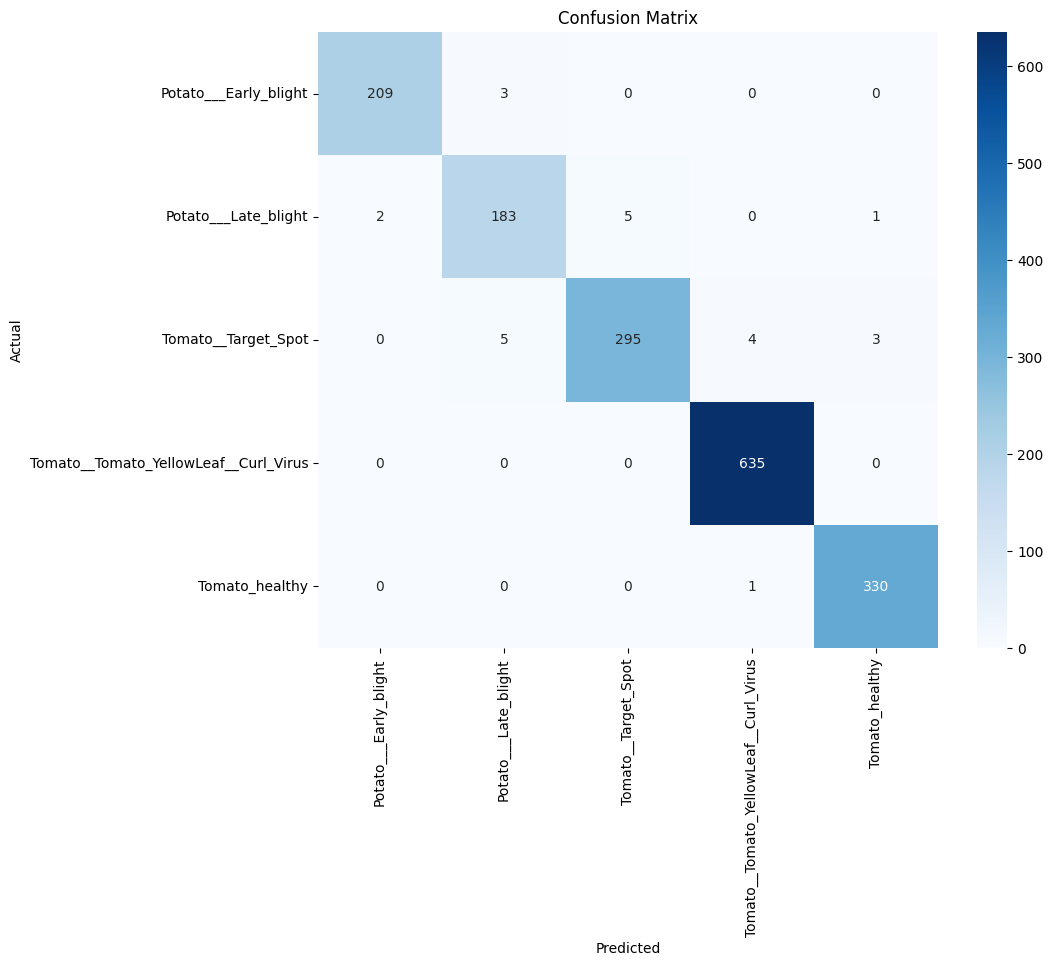

In [23]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [24]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

Classification Report:
                                       precision    recall  f1-score   support

                Potato___Early_blight       0.99      0.99      0.99       212
                 Potato___Late_blight       0.96      0.96      0.96       191
                  Tomato__Target_Spot       0.98      0.96      0.97       307
Tomato__Tomato_YellowLeaf__Curl_Virus       0.99      1.00      1.00       635
                       Tomato_healthy       0.99      1.00      0.99       331

                             accuracy                           0.99      1676
                            macro avg       0.98      0.98      0.98      1676
                         weighted avg       0.99      0.99      0.99      1676

